# Assignment

Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

In [2]:
zoo_data = pd.read_csv('Zoo.csv')
zoo_data.head(3)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


In [3]:
zoo_data.shape

(101, 18)

In [4]:
zoo_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
zoo_data[zoo_data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [8]:
#lets see how many categories are there in type
print("no of Types :",len(zoo_data['type'].value_counts()))
print("Frequency of Types")
zoo_data['type'].value_counts()

no of Types : 7
Frequency of Types


1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<AxesSubplot: xlabel='count', ylabel='type'>

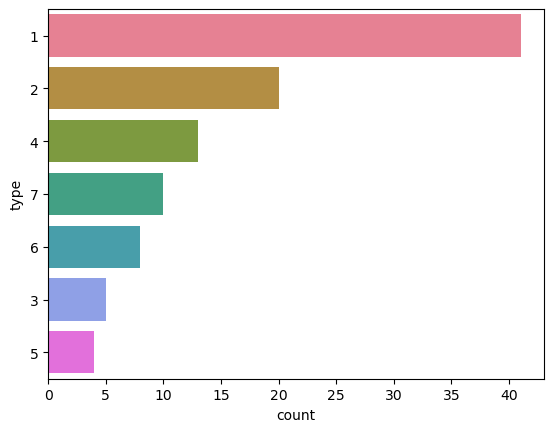

In [9]:
sns.countplot(y="type", data=zoo_data,order=zoo_data['type'].value_counts().index ,palette="husl")

In [10]:
#lets see how many categories are there in legs
print("no of legs types :",len(zoo_data['legs'].value_counts()))
print("Frequency of Types")
zoo_data['legs'].value_counts()

no of legs types : 6
Frequency of Types


4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

<AxesSubplot: xlabel='count', ylabel='legs'>

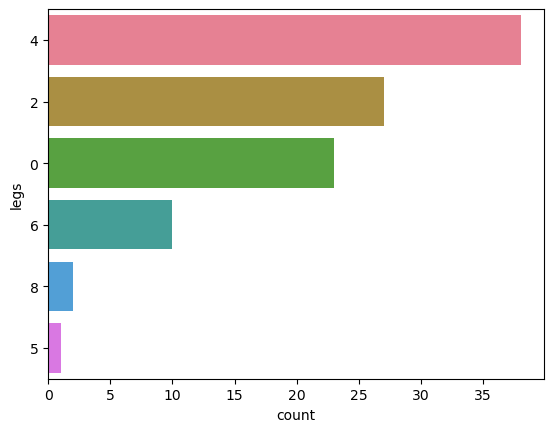

In [11]:
sns.countplot(y="legs", data=zoo_data,order=zoo_data['legs'].value_counts().index ,palette="husl")

<AxesSubplot: xlabel='count', ylabel='toothed'>

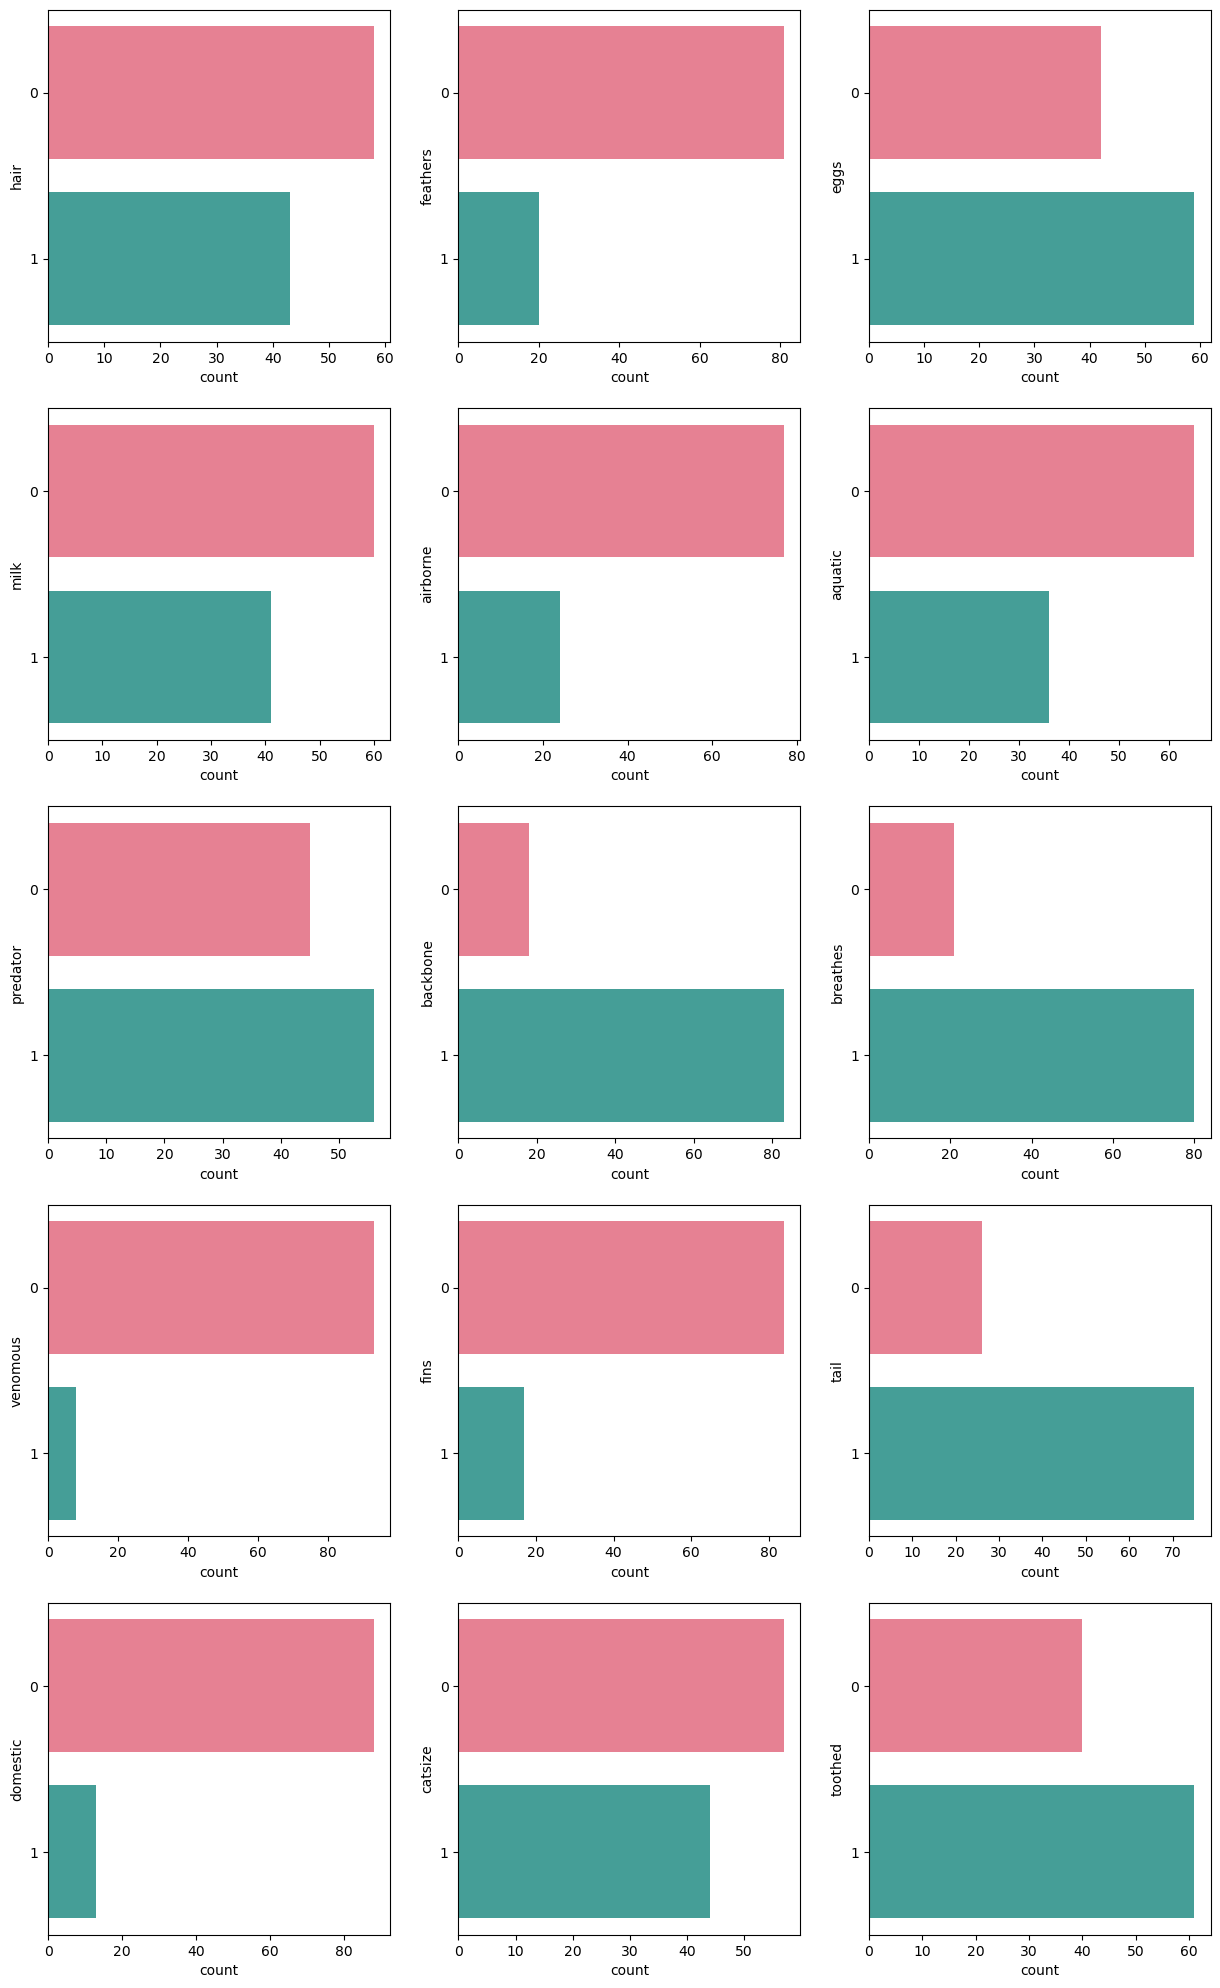

In [12]:
fig, ax =plt.subplots(5,3, figsize=(15,25)) 

sns.countplot(y='hair',data=zoo_data,palette="husl" ,ax=ax[0,0])
sns.countplot(y='feathers',data=zoo_data,palette="husl" ,ax=ax[0,1])
sns.countplot(y='eggs',data=zoo_data,palette="husl" ,ax=ax[0,2])

sns.countplot(y='milk',data=zoo_data,palette="husl" ,ax=ax[1,0])
sns.countplot(y='airborne',data=zoo_data,palette="husl" ,ax=ax[1,1])
sns.countplot(y='aquatic',data=zoo_data,palette="husl" ,ax=ax[1,2])

sns.countplot(y='predator',data=zoo_data,palette="husl" ,ax=ax[2,0])
sns.countplot(y='backbone',data=zoo_data,palette="husl" ,ax=ax[2,1])
sns.countplot(y='breathes',data=zoo_data,palette="husl" ,ax=ax[2,2])

sns.countplot(y='venomous',data=zoo_data,palette="husl" ,ax=ax[3,0])
sns.countplot(y='fins',data=zoo_data,palette="husl" ,ax=ax[3,1])
sns.countplot(y='tail',data=zoo_data,palette="husl" ,ax=ax[3,2])

sns.countplot(y='domestic',data=zoo_data,palette="husl" ,ax=ax[4,0])
sns.countplot(y='catsize',data=zoo_data,palette="husl" ,ax=ax[4,1])
sns.countplot(y='toothed',data=zoo_data,palette="husl" ,ax=ax[4,2])




In [13]:
zoo_data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

<AxesSubplot: xlabel='type', ylabel='count'>

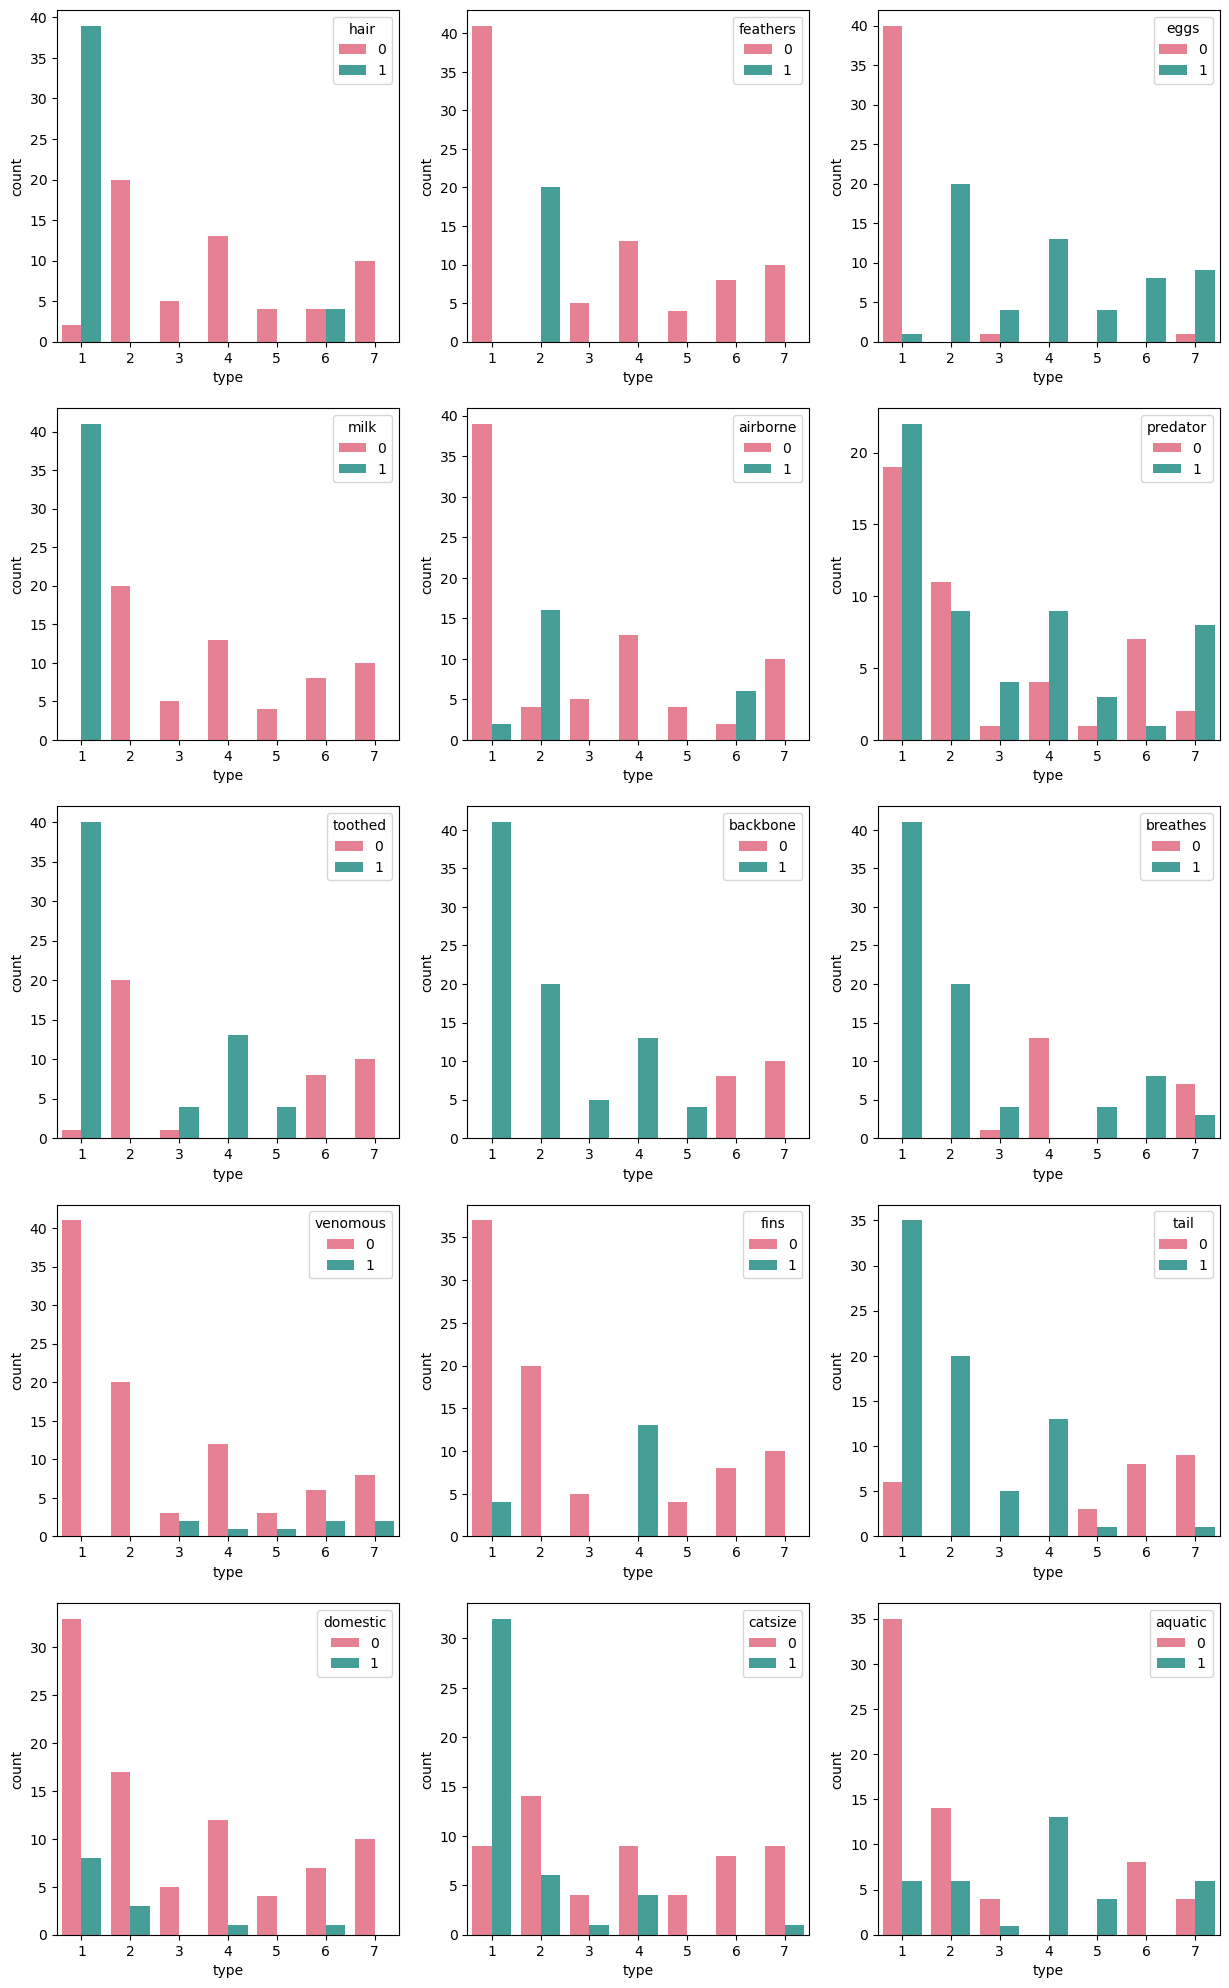

In [14]:
#Analysis of other features with Target Feature
fig, ax =plt.subplots(5,3, figsize=(15,25)) 

sns.countplot(x='type', hue='hair',data=zoo_data,palette="husl" ,ax=ax[0,0])
sns.countplot(x='type', hue='feathers',data=zoo_data,palette="husl" ,ax=ax[0,1])
sns.countplot(x='type', hue='eggs',data=zoo_data,palette="husl" ,ax=ax[0,2])

sns.countplot(x='type', hue='milk',data=zoo_data,palette="husl" ,ax=ax[1,0])
sns.countplot(x='type', hue='airborne',data=zoo_data,palette="husl" ,ax=ax[1,1])
sns.countplot(x='type', hue='predator',data=zoo_data,palette="husl" ,ax=ax[1,2])

sns.countplot(x='type', hue='toothed',data=zoo_data,palette="husl" ,ax=ax[2,0])
sns.countplot(x='type', hue='backbone',data=zoo_data,palette="husl" ,ax=ax[2,1])
sns.countplot(x='type', hue='breathes',data=zoo_data,palette="husl" ,ax=ax[2,2])

sns.countplot(x='type', hue='venomous',data=zoo_data,palette="husl" ,ax=ax[3,0])
sns.countplot(x='type', hue='fins',data=zoo_data,palette="husl" ,ax=ax[3,1])
sns.countplot(x='type', hue='tail',data=zoo_data,palette="husl" ,ax=ax[3,2])

sns.countplot(x='type', hue='domestic',data=zoo_data,palette="husl" ,ax=ax[4,0])
sns.countplot(x='type', hue='catsize',data=zoo_data,palette="husl" ,ax=ax[4,1])
sns.countplot(x='type', hue='aquatic',data=zoo_data,palette="husl" ,ax=ax[4,2])

<AxesSubplot: xlabel='type', ylabel='count'>

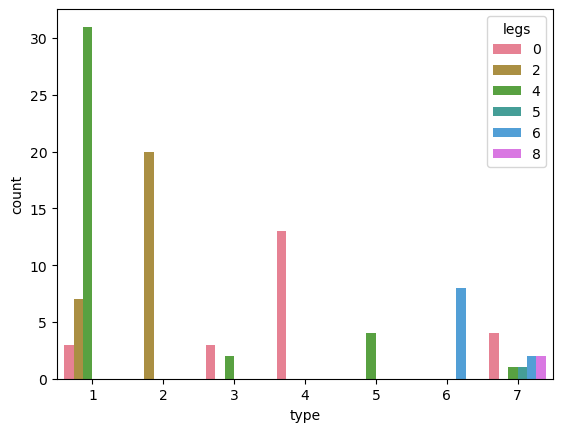

In [15]:
sns.countplot(x='type', hue='legs',data=zoo_data,palette="husl")

In [16]:
zoo_data.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<AxesSubplot: >

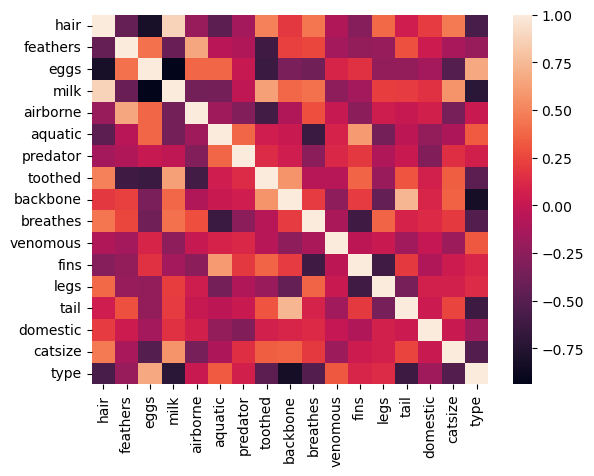

In [17]:
sns.heatmap(zoo_data.corr())

In [18]:
#Splitting the dataset into training and testing
X = zoo_data.drop(['type','animal name'],axis=1)
Y = zoo_data['type']

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [20]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
31,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0
79,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [21]:
#Grid Searching Algorithm Tuning
#Finding the best k value for KNN model
n_neighbors = np.array(range(3,40,2))
param_grid = dict(n_neighbors=n_neighbors)

In [22]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X,Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 3}


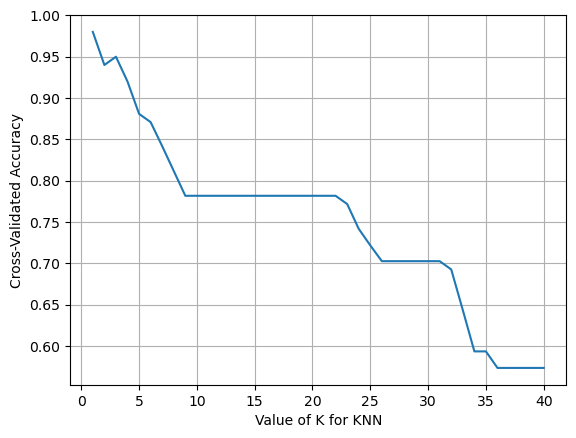

In [24]:
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.grid()
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [25]:
#Taking k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [26]:
pred = knn.predict(X_test)
pred

array([2, 4, 2, 2, 1, 1, 1, 5, 6, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       4, 1, 4, 6, 6, 1, 4, 7, 2])

In [27]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.97        31
   macro avg       0.82      0.86      0.84        31
weighted avg       0.94      0.97      0.95        31



In [28]:
results = cross_val_score(knn, X_train, Y_train, cv=10)
results

array([0.85714286, 1.        , 0.85714286, 0.85714286, 1.        ,
       1.        , 0.71428571, 0.85714286, 0.71428571, 0.71428571])

In [29]:
print(results.mean())

0.8571428571428571


In [30]:
res_cmp_df = pd.DataFrame(Y_test)
res_cmp_df['pred_type'] = pred

In [31]:
res_cmp_df

,type,pred_type
43,2,2
82,4,4
11,2,2
71,2,2
65,1,1
96,1,1
67,1,1
25,5,5
42,6,6
27,1,1
